<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Разобьём-данные-на-обучающую-и-валидационную-выборки-в-соотношении-75:25." data-toc-modified-id="Разобьём-данные-на-обучающую-и-валидационную-выборки-в-соотношении-75:25.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разобьём данные на обучающую и валидационную выборки в соотношении 75:25.</a></span></li><li><span><a href="#Обучим-модель-и-сделаем-предсказания-на-валидационной-выборке.-Сохраним-предсказания-и-правильные-ответы-на-валидационной-выборке." data-toc-modified-id="Обучим-модель-и-сделаем-предсказания-на-валидационной-выборке.-Сохраним-предсказания-и-правильные-ответы-на-валидационной-выборке.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучим модель и сделаем предсказания на валидационной выборке. Сохраним предсказания и правильные ответы на валидационной выборке.</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Расчитаем-прибыль" data-toc-modified-id="Расчитаем-прибыль-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Расчитаем прибыль</a></span></li><li><span><a href="#Расчитаем-риски" data-toc-modified-id="Расчитаем-риски-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Расчитаем риски</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Общий-Вывод" data-toc-modified-id="Общий-Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий Вывод</a></span></li></ul></div>

# Выбор места для скважины

Необходимо решить, где бурить новую скважину.

Есть пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 

Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой *Bootstrap.*


**Шаги для выбора локации:**

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.



## Загрузка и подготовка данных

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.linear_model import LinearRegression # алгоритм линейной регрессии
from sklearn.model_selection import train_test_split # чтобы делить выборки
from sklearn.metrics import mean_squared_error # RMSE модели линейной регрессии

import warnings
warnings.filterwarnings('ignore')

Загрузим данные и посмотрим на них:


In [43]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [44]:
# функция для описания датафрейма:
def describe_df (df):
  print(df.head(5))
  print('''
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).
''')
  print()
  print('Проверим наличие явных дубликатов: ')
  print('Явных дубликатов: ', df.duplicated().sum())
  print()
  print('Выведем общую информацию о таблице: ')
  print(df.info())

In [45]:
describe_df (df_0)

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).


Проверим наличие явных дубликатов: 
Явных дубликатов:  0

Выведем общую информацию о таблице: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [46]:
describe_df (df_1)

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).


Проверим наличие явных дубликатов: 
Явных дубликатов:  0

Выведем общую информацию о таблице: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [47]:
describe_df (df_2)

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).


Проверим наличие явных дубликатов: 
Явных дубликатов:  0

Выведем общую информацию о таблице: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


Данные соответствуют описанию. Пропусков и дубликатов нет.
Типы данных соответствуют описанию.

Посмотрим на гистограммы распределений данных:



In [48]:
# функция для постоения гистограммы и диаграмы распределения
def show_hists(df, data_label, num_bins, rug=False, log_scale=False):
    """
    input: data - данные для построения гистограммы
           data_label - описание данных
           num_bins - количество ячеек
    output: None
    description: Функция строит гистограмму и boxplot для выбранного параметра:
                - Плотность распределения (методом distplot() библиотеки seaborn)
                - Boxplot (метод boxplot() библиотеки seaborn)
    """
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].set_title(data_label + ". Плотность распределения", fontsize=18)
    axes[0].set_ylabel('кол-во объектов', fontsize=15)
    sns.distplot(df, bins=num_bins, rug=rug, ax=axes[0], kde=False)
    axes[1].set_title(data_label + ". Boxplot", fontsize=18)
    sns.boxplot(data=df, ax=axes[1], orient="h")
    plt.show()

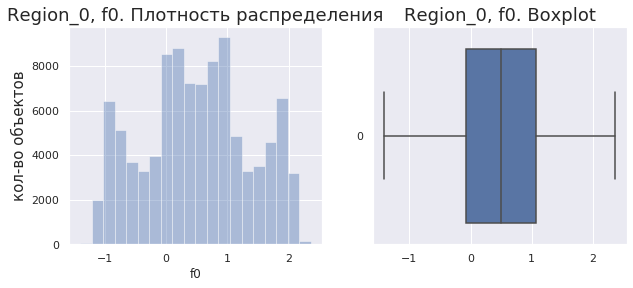

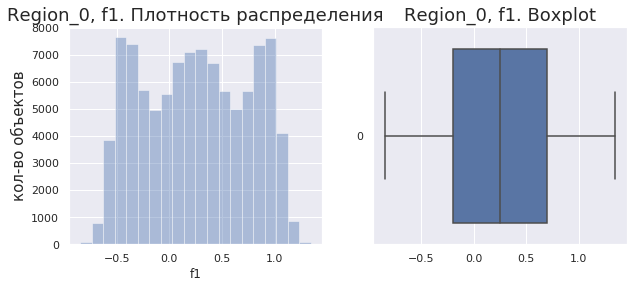

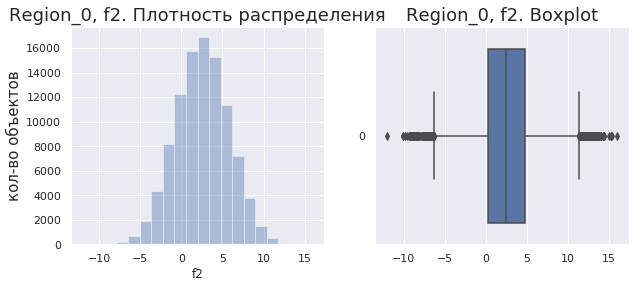

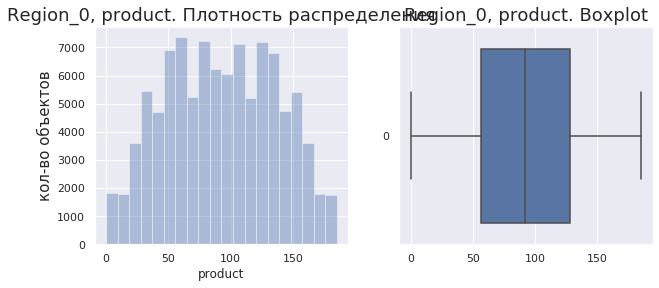

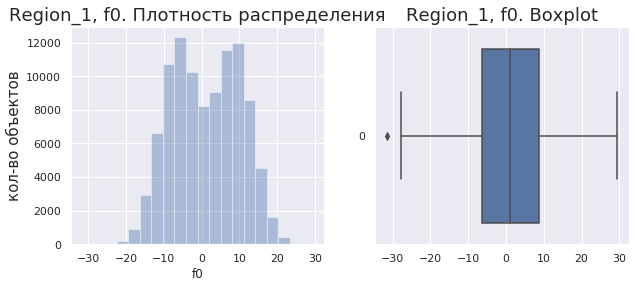

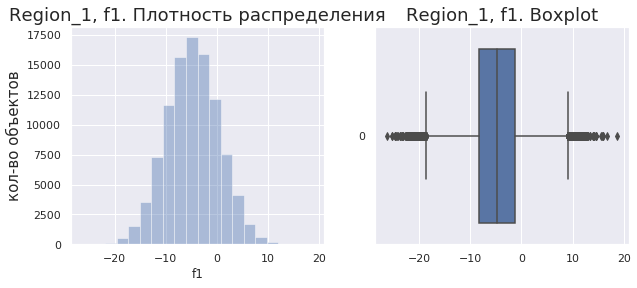

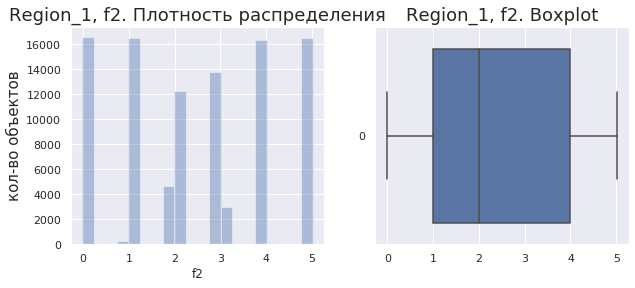

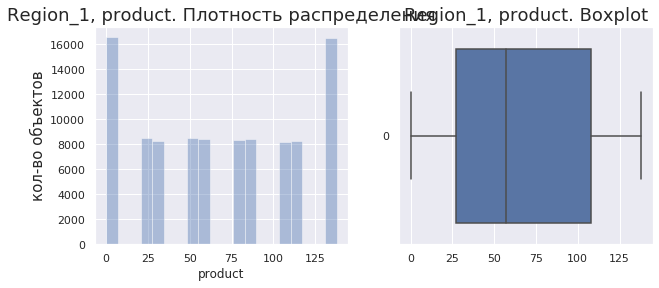

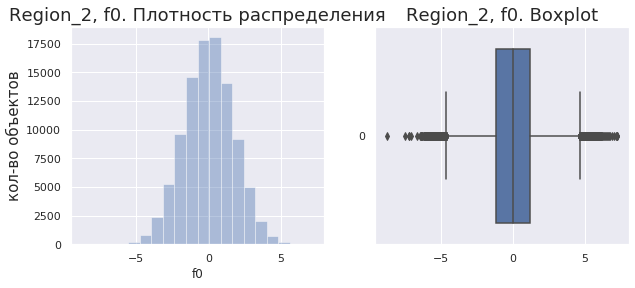

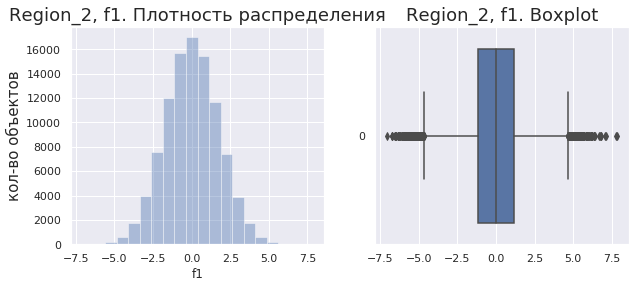

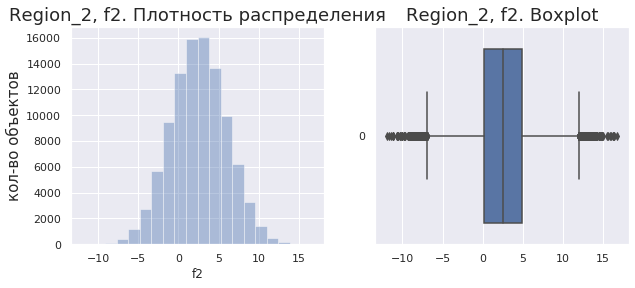

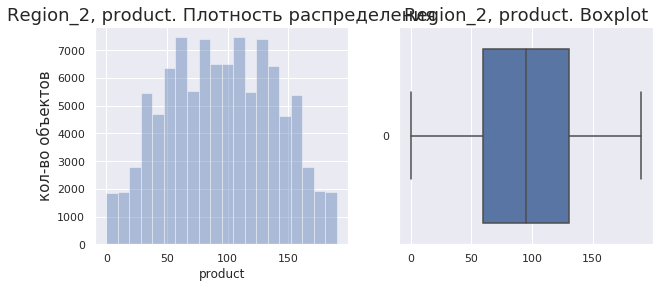

In [49]:
for df, name in [(df_0, 'Region_0'), (df_1, 'Region_1'), (df_2, 'Region_2')]: # Для каждого региона
    numerics = ['f0', 'f1', 'f2', 'product'] # Выберем столбцы
    for column in numerics: # Для каждого столбца в выбраном регионе
        show_hists(df[column], name + ', ' + column, num_bins=20) # Построим распределиния

Распределения некоторых признаков отличаются от нормального. Также присутствуют небольшие выбросы. Так как неизвестно, что означают сами признаки, сложно оценить адекватность распределений и выбросов.

Масштабы распределений признаков f0, f1, f2 не сильно отличаются друг от друга (меньше одного порядка).

На данном этапе оставим данные как есть.

## Обучение и проверка модели

### Разобьём данные на обучающую и валидационную выборки в соотношении 75:25.

In [50]:
# функция для разбиения на выборки
def features_target_split (df, valid_ratio):
  features = df.drop(['product','id'], axis=1)
  target = df['product']

  features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=valid_ratio, random_state=12345) # отделим данные для тренировочной валидационной выборки
  print('Для проверки посмотрим на размер выборок:')
  print('features_train.shape: ', features_train.shape)
  print('features_valid.shape: ', features_valid.shape)
  print('target_train.shape: ', target_train.shape)
  print('target_valid.shape: ', target_valid.shape)

  return features_train, features_valid, target_train, target_valid 

Выборки нулевого региона:

In [51]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = features_target_split (df_0, 0.25)

Для проверки посмотрим на размер выборок:
features_train.shape:  (75000, 3)
features_valid.shape:  (25000, 3)
target_train.shape:  (75000,)
target_valid.shape:  (25000,)


Выборки первого региона:

In [52]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = features_target_split (df_1, 0.25)

Для проверки посмотрим на размер выборок:
features_train.shape:  (75000, 3)
features_valid.shape:  (25000, 3)
target_train.shape:  (75000,)
target_valid.shape:  (25000,)


Выборки второго региона:

In [53]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = features_target_split (df_2, 0.25)

Для проверки посмотрим на размер выборок:
features_train.shape:  (75000, 3)
features_valid.shape:  (25000, 3)
target_train.shape:  (75000,)
target_valid.shape:  (25000,)


### Обучим модель и сделаем предсказания на валидационной выборке. Сохраним предсказания и правильные ответы на валидационной выборке.

In [54]:
# функция для модели:
def model_learn (features_train, features_valid, target_train, target_valid):
  model = LinearRegression()
  model.fit(features_train,target_train) # обучим модель на тренировочной выборке
  predictions_valid = model.predict(features_valid) # получим предсказания модели на валидационной выборке

  RMSE_result = mean_squared_error(target_valid, predictions_valid) ** 0.5 
  print("RMSE модели линейной регрессии на валидационной выборке:", RMSE_result)
  print('средний запас предсказанного сырья: ', sum(predictions_valid)/len(predictions_valid))

  return predictions_valid

In [55]:
predictions_valid_0 = model_learn (features_train_0, features_valid_0,
                                                     target_train_0, target_valid_0)

RMSE модели линейной регрессии на валидационной выборке: 37.5794217150813
средний запас предсказанного сырья:  92.59256778438008


In [56]:
predictions_valid_1 = model_learn (features_train_1, features_valid_1,
                                                     target_train_1, target_valid_1)

RMSE модели линейной регрессии на валидационной выборке: 0.893099286775616
средний запас предсказанного сырья:  68.7285468954458


In [57]:
predictions_valid_2 = model_learn (features_train_2, features_valid_2,
                                                           target_train_2, target_valid_2)

RMSE модели линейной регрессии на валидационной выборке: 40.02970873393434
средний запас предсказанного сырья:  94.96504596800506


### Выводы

Для трёх выбранных регионов данные были разбиты на обучающие и валидационные выборки. Было проведено обучение моделей с помощью линейной регресии. 


  В регионах 0 и 2 достаточно высокий средний показатель запаса предсказанного сырья (92.6 и 94.9 соответственно). Однако RMSE для данных регионов также высок (37.6 и 40 соответственно).

  В регионе 1 средний показатель запаса предсказанного сырья составляет 68.7 (ниже остальных регионов). Однако RMSE в данном регионе также мал (0.9). Это говорит о точности предсказаний и качестве построенной модели. 
  
  Такой разброс  из-за того, что в разных регионах разные данные. Где-то данные простые, и модель хорошо с ними справляется. А где-то данные сложные, и модели тяжело.





## Подготовка к расчёту прибыли

- Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.
- Сравним полученный объём сырья со средним запасом в каждом регионе.



10млрд - это бюджет на 200 скважин. Посчитаем сколько в среднем должно быть в одной скважине, чтобы не прогореть, выбирая скважины для бурения случайно.
После этого сравним это число со средним объемом сырья в одной скважине в каждом регионе.
Если вдруг найдется регион, где средний объём одной скважины окажется больше необходимого значения, то никакой МЛ дальше не нужен. Буря случайную скважину компания выходит в плюс.
Если такой ситуации не возникнет, то понадобится МЛ, чтобы выбирать скважины не случайно, а с помощью предсказаний модели.

минимальный объём продукта с одной скважины = бюджет / (200 скважин * доход с единицы продукта)

In [58]:
budget = 10**10 # Бюджет на разработку скважин в регионе 
count_explore_points = 500 # При разведке региона исследуют 500 точек
count_best_points = 200 # из которых с помощью машинного обучения выбирают 200 лучших для разработки.
prise_per_barrel = 450 #  один баррель сырья приносит 450 рублей дохода
prise_per_product = 450000 #  Доход с каждой единицы продукта составляет450 т.р, поскольку объём указан в тысячах баррелей

In [59]:
min_product = budget / (count_best_points * prise_per_product)

print('Минимальный объём продукта с одной скважины для безубыточной разработки: {:.2f}'.format(min_product))

Минимальный объём продукта с одной скважины для безубыточной разработки: 111.11


 Минимальный объём продукта для безубыточной разработки составляет 111.11. 

Данное значение превышает средние значения запасов скважин по всем регионам.

Это означает, что необходимо воспользоваться предсказанием лучших скважин.



## Расчёт прибыли и рисков 

### Расчитаем прибыль

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

- Выберем скважины с максимальными значениями предсказаний. Количество скважин зависит от бюджета компании и стоимости разработки одной скважины. В нашем случае выберем случайно 500 точек и отберём 200 с максимальным показателем объёма сырья.
- Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
- Рассчитаем прибыль для полученного объёма сырья.



Для удобства переведём целевые признаки валидационной выборки и предсказания для валидационной выборки в объекты Series с одинаковыми индексами..

In [60]:
target_valid_0 = pd.Series(target_valid_0).reset_index(drop=True)
target_valid_1 = pd.Series(target_valid_1).reset_index(drop=True)
target_valid_2 = pd.Series(target_valid_2).reset_index(drop=True)

In [61]:
predictions_valid_0 = pd.Series(*predictions_valid_0.reshape(1,-1))
predictions_valid_1 = pd.Series(*predictions_valid_1.reshape(1,-1))
predictions_valid_2 = pd.Series(*predictions_valid_2.reshape(1,-1))

In [62]:
predictions_valid_0 = pd.Series(*predictions_valid_0.values.reshape(1,-1))
predictions_valid_1 = pd.Series(*predictions_valid_1.values.reshape(1,-1))
predictions_valid_2 = pd.Series(*predictions_valid_2.values.reshape(1,-1))

In [63]:
state = 12345
def predicted_income(target, predicts, region_name, state, replace, show_res, return_res):
    """
                   Функция берёт выборку размера 500, выбирает 200 наивысших значений,
                   и считает: - среднее значение объёма сырья для выбранных скважин,
                              - суммарный целевой объём сырья
                              - прибыль для полученного объёма сырья
    """

    sample_preds = predicts.sample(n=count_explore_points, 
                                   replace=replace,     # создаём подвыбору без возвращения. 
                                   random_state=state)  # Один и тот же элемент попадает в подвыборку один раз.
    top_preds = sample_preds.sort_values(ascending=False)[:count_best_points] # выбираем 200 лучших точек выборки
    top_targets = target[top_preds.index] # с помощью индексов лучших предсказаний забираем целевые признаки с теми же индексами
    count_best_points_mean = top_targets.mean() # среднее значение объёма сырья в лучших точках
    volume = sum(top_targets) # объём продукта во всех лучших точках
    income = volume * prise_per_product - budget # прибыль с лучших точек


    if show_res:
      # выводит описание для региона:
      print('===', region_name, '===')
      print('Средний запас сырья среди скважин с максимальным показателем: {:.2f}'.format(count_best_points_mean))
      print('Суммарный целевой объём сырья в лучших скважинах: {:.2f}'.format(volume))
      print('Прибыль для полученного объёма сырья для лучших скважин: {:.2f}'.format(income))
    if return_res:
      return income


In [64]:
predicted_income(target_valid_0, predictions_valid_0, 'Регион 0', state, False, show_res=True, return_res=False)

=== Регион 0 ===
Средний запас сырья среди скважин с максимальным показателем: 118.66
Суммарный целевой объём сырья в лучших скважинах: 23731.26
Прибыль для полученного объёма сырья для лучших скважин: 679068857.89


In [65]:
predicted_income(target_valid_1, predictions_valid_1, 'Регион 1', state, False, show_res=True, return_res=False)

=== Регион 1 ===
Средний запас сырья среди скважин с максимальным показателем: 119.77
Суммарный целевой объём сырья в лучших скважинах: 23954.40
Прибыль для полученного объёма сырья для лучших скважин: 779479884.18


In [66]:
predicted_income(target_valid_2, predictions_valid_2, 'Регион 2', state, False, show_res=True, return_res=False)

=== Регион 2 ===
Средний запас сырья среди скважин с максимальным показателем: 116.00
Суммарный целевой объём сырья в лучших скважинах: 23199.98
Прибыль для полученного объёма сырья для лучших скважин: 439990143.02


### Расчитаем риски

 Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли. Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [67]:
def risk_calc(target, predicts, region_name):
    """

                  - функция реализует технику bootstrap, количество выборок = bootstrap_samples.
                  - Функция берёт выборку размера 500, выбирает 200 наивысших значений,
                    считает общую прибыль income_pred и сохраняет её в списке incomes.
                  - Функция выводит:  оценку средней прибыли
                                      95% доверительный интервал (считается с помощью функции quantile)
                                      риск убытков 
    """
    bootstrap_samples = 1000
    alpha = 0.05
    incomes = []
    state = np.random.RandomState(12345)
# Для выбранного региона для каждого бутстрепа запишем прибыль с лучших точек
    for i in range(bootstrap_samples):
        income = predicted_income(target, predicts, region_name, state, True, show_res=False, return_res=True)  
        incomes.append(income)                                  
    incomes = pd.Series(incomes)
    income_mean = incomes.mean() # средняя прибыль с лучших точек для каждой выборке в бутстрепе

    # Процедурой бутстреп находим 95%-й доверительный интервал прибыли.
    # начало интервала в переменной conf_int_left, а конец — в conf_int_right.
    conf_int_left = incomes.quantile(alpha/2)
    conf_int_right = incomes.quantile(1 - alpha/2)
    
    loss_count = 0
    for inc in incomes :
        if inc < 0 :
            loss_count += 1
    loss_rate = loss_count / bootstrap_samples
    
    print('===', region_name, '===')
    print('Средняя прибыль {:.2f} (млн. Р)'.format(income_mean / 10**6))
    print('95% доверительный интервал: {:.2f} : {:.2f} (млн. Р)'.format(conf_int_left / 10**6, conf_int_right / 10**6))
    print('Риск убытков: {:.2f} %'.format(loss_rate * 100))


In [68]:
risk_calc(target_valid_0, predictions_valid_0, 'Регион 0')

=== Регион 0 ===
Средняя прибыль 396.16 (млн. Р)
95% доверительный интервал: -111.22 : 909.77 (млн. Р)
Риск убытков: 6.90 %


In [69]:
risk_calc(target_valid_1, predictions_valid_1, 'Регион 1')

=== Регион 1 ===
Средняя прибыль 456.05 (млн. Р)
95% доверительный интервал: 33.82 : 852.29 (млн. Р)
Риск убытков: 1.50 %


In [70]:
risk_calc(target_valid_2, predictions_valid_2, 'Регион 2')

=== Регион 2 ===
Средняя прибыль 404.40 (млн. Р)
95% доверительный интервал: -163.35 : 950.36 (млн. Р)
Риск убытков: 7.60 %


### Выводы

При расчёте показателей для 200 наилучших скважин из 500 в выборке:
  Средний запас сырья с одной скважины среди всех регионов (119, 120, 116 тысяч баррелей соответственно) превосходит минимально необходимый объём 111.11.

При применении техники bootstrap:
  Оценка средней прибыли максимальна для региона 1 (780 млн.р.)
  
  Только регион 1 прогнозирует прибыльную разработку по 95% доверительному интервалу.
  Риск убытков для региона 1 (1.5%)
  Рекомендуем регион 1 для разработки.

## Общий Вывод

  При начальном построении модели и предсказаний:
- В регионах 0 и 2 достаточно высокий средний показатель запаса предсказанного сырья. Однако RMSE для данных регионов также высок (37.6 и 40 соответственно). Это свидетельствует о неоднозначности показателя, неточности модели регрессии.
- В регионе 1 средний показатель запаса предсказанного сырья ниже остальных регионов. Однако RMSE в данном регионе мал (0.9). Это говорит о точности предсказаний и качестве построенной модели.
- Средние показатели предсказанного сырья для одной скважины для всех регионов ниже теоретически необходимых.
  
  
  При расчёте показателей для 200 наилучших скважин из выборочных 500:
- Средний запас сырья с одной скважины среди всех регионов превосходит минимально необходимый объём.

  
  При применении техники bootstrap:
- Оценка средней прибыли максимальна для региона 1 (780 млн.р.).
- Только регион 1 прогнозирует прибыльную разработку по 95%.доверительному интервалу.
- Риск убытков для региона 1 (1.5%)
  Рекомендуем регион 1 для разработки.

